In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy=True

insurance = pd.read_csv(r"C:\Users\Administrator\Downloads\insurance.csv")
# insurance.to_csv("Insurance data.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [2]:
print ("Rows     : " , insurance.shape[0])
print ("Columns  : " , insurance.shape[1])
print ("\nFeatures : \n" , insurance.columns.tolist())
print ("\nMissing values :  ", insurance.isnull().sum().values.sum())
print ("\nUnique values :  \n",insurance.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


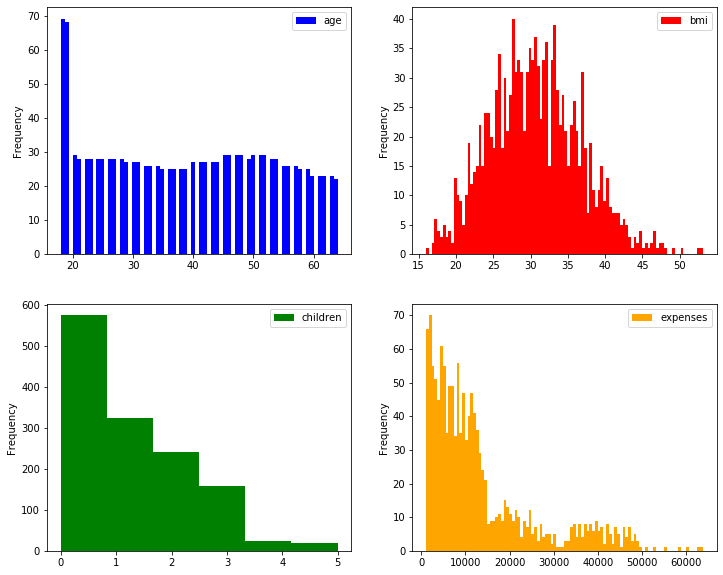

In [4]:
# Data exploration

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="expenses", bins=100, color="orange", ax=axes[1][1])
plt.show()

In [5]:
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


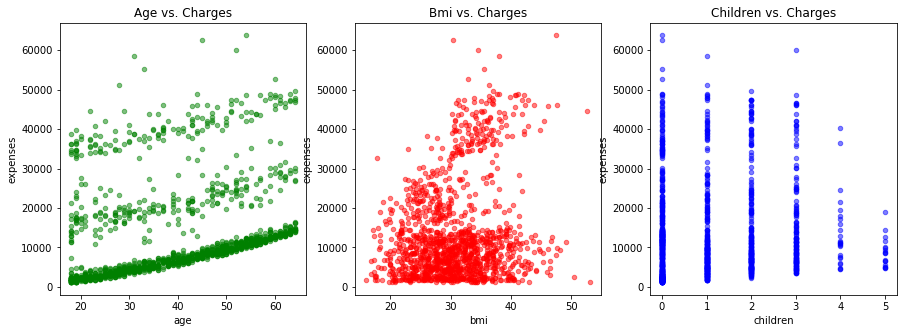

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='expenses', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
insurance.plot(kind='scatter', x='bmi', y='expenses', alpha=0.5, color='red', ax=axes[1], title="Bmi vs. Charges")
insurance.plot(kind='scatter', x='children', y='expenses', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

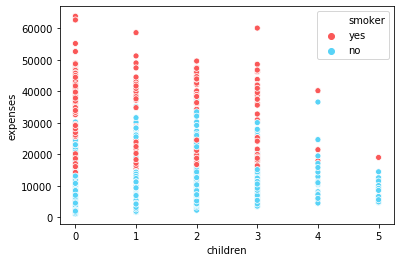

In [9]:
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="children", y="expenses", data=insurance, palette=pal, hue='smoker')

Text(0.5, 1, 'Smokers')

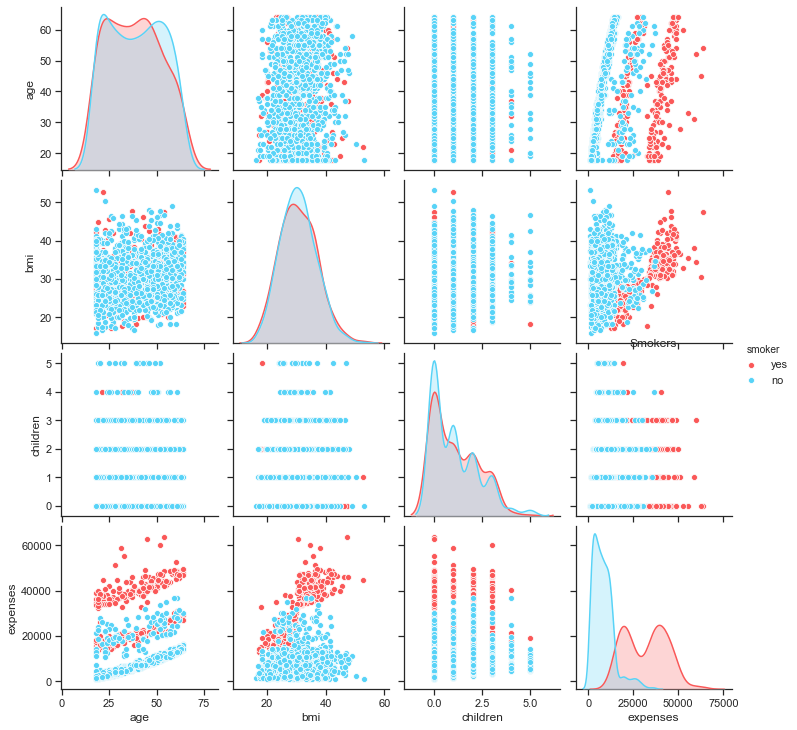

In [10]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")

In [11]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
insurance.drop(["Unnamed: 0"], axis=1, inplace=True) 
insurance.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [15]:
# Label or integer encoding is possible 

#insurance['sex'] = insurance['sex'].map(lambda s :1  if s == 'female' else 0)
#insurance['smoker'] = insurance['smoker'].map(lambda s :1  if s == 'yes' else 0)

#insurance.head()

In [16]:
# One hot encoding

cat_col=['smoker','region','sex']
num_col=[i for i in insurance.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

In [17]:
one_hot=pd.get_dummies(insurance[cat_col])
insurance=pd.concat([insurance[num_col],one_hot],axis=1)
insurance.head(10)

,age,bmi,children,expenses,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.9,0,16884.92,0,1,0,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,0,1,0,0,0,1
5,31,25.7,0,3756.62,1,0,0,0,1,0,1,0
6,46,33.4,1,8240.59,1,0,0,0,1,0,1,0
7,37,27.7,3,7281.51,1,0,0,1,0,0,1,0
8,37,29.8,2,6406.41,1,0,1,0,0,0,0,1
9,60,25.8,0,28923.14,1,0,0,1,0,0,1,0


In [19]:
X = insurance.drop(['expenses'], axis = 1)
y = insurance.expenses

In [20]:
# Train test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [36]:
y_train

1075     4562.84
131     13616.36
15       1837.24
1223    26125.67
1137     3176.29
          ...   
763      3070.81
835      7160.33
1216     5415.66
559      1646.43
684      4766.02
Name: expenses, Length: 1003, dtype: float64

In [21]:
# Normalising the data is also an option

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [22]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [24]:
x_train_poly.shape

(1003, 364)

In [25]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

In [26]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

In [27]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
# Importing evaluation metrics

from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

In [29]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.48823752888230176
Testing Accuracy for Multiple Linear Regression Model:  -0.31239108805386784
RMSE for Training Data:  14582.825802988371
RMSE for Testing Data:  14374.131355886064
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7476018110609117


In [30]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8471878504956194
Testing Accuracy for Polynomial Regression Model:  0.8666949486003128
RMSE for Training Data:  4672.878665302065
RMSE for Testing Data:  4581.136964827854
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8297638808642149


In [31]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8694256881440832
Testing Accuracy for Decision Tree Regression Model:  0.8711939744446933
RMSE for Training Data:  4319.509514116047
RMSE for Testing Data:  4503.167101749359
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8474619069674989


In [32]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8803128169108817
Testing Accuracy for Random Forest Regression Model:  0.8981242707782816
RMSE for Training Data:  4135.512948005822
RMSE for Testing Data:  4004.841551094661
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.85893865703498


In [33]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.6513268888417149
Testing Accuracy for Support Vector Regression Model:  0.7335308881880044
RMSE for Training Data:  7058.538542926969
RMSE for Testing Data:  6476.992738419854
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.6810137696577772


In [34]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.488238,-0.312391,14582.825803,14374.131356,0.747602
Polynomial Regression,fit_intercept=False,0.847188,0.866695,4672.878665,4581.136965,0.829764
Decision Tree Regression,max_depth=5,0.869426,0.871194,4319.509514,4503.167102,0.847462
Random Forest Regression,"n_estimators=400, max_depth=5",0.880313,0.898124,4135.512948,4004.841551,0.858939
Support Vector Regression,"kernel=”linear”, C=1000",0.651327,0.733531,7058.538543,6476.992738,0.681014
